In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('twitter_training.csv')


In [3]:
# Perform basic data preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64


In [4]:
# Analyze sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print("Sentiment distribution:")
print(sentiment_distribution)

Sentiment distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


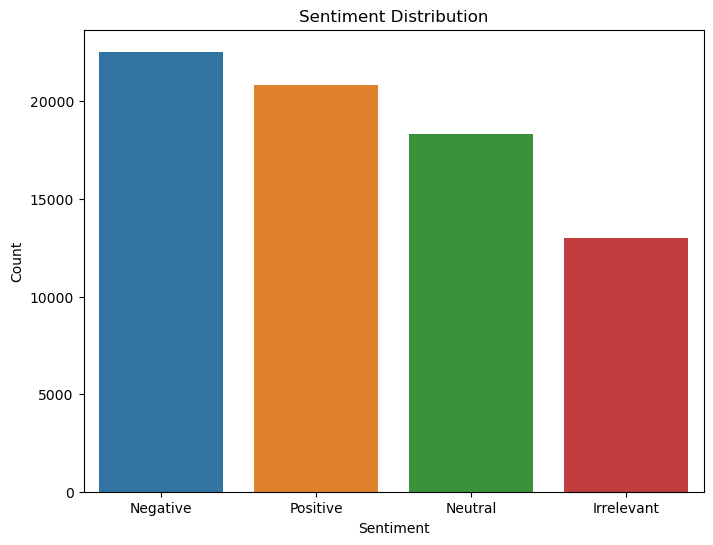

In [5]:
# Visualize the sentiment patterns

# Sentiment distribution overall
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=sentiment_distribution.index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [9]:
# Top Entities by Sentiment
top_positive = df[df['Sentiment'] == 'Positive']['Entity'].value_counts().head(10)
top_negative = df[df['Sentiment'] == 'Negative']['Entity'].value_counts().head(10)
top_neutral = df[df['Sentiment'] == 'Neutral']['Entity'].value_counts().head(10)

print("Top 10 Entities with Positive Sentiment:")
print(top_positive)
print("\nTop 10 Entities with Negative Sentiment:")
print(top_negative)
print("\nTop 10 Entities with Neutral Sentiment:")
print(top_neutral)

Top 10 Entities with Positive Sentiment:
Entity
AssassinsCreed               1446
Borderlands                  1020
Cyberpunk2077                 966
PlayStation5(PS5)             942
RedDeadRedemption(RDR)        930
CallOfDutyBlackopsColdWar     864
Hearthstone                   834
Nvidia                        816
Xbox(Xseries)                 792
HomeDepot                     780
Name: count, dtype: int64

Top 10 Entities with Negative Sentiment:
Entity
MaddenNFL               1710
NBA2K                   1476
FIFA                    1176
TomClancysRainbowSix    1122
Verizon                 1098
HomeDepot                900
TomClancysGhostRecon     900
CallOfDuty               894
johnson&johnson          846
Microsoft                774
Name: count, dtype: int64

Top 10 Entities with Neutral Sentiment:
Entity
Amazon                    1236
WorldOfCraft              1068
johnson&johnson           1014
ApexLegends                942
Nvidia                     870
Microsoft         

In [10]:
# Time Series Analysis (if a timestamp column is available)
# Assume the column name for timestamps is 'Timestamp'
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)


In [15]:
# Group by Entity and Sentiment and count the occurrences
entity_sentiment = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)


In [16]:
entity_sentiment

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


In [17]:
# Normalize the counts to get the percentage
entity_sentiment_percentage = entity_sentiment.div(entity_sentiment.sum(axis=1), axis=0) * 100


In [18]:
entity_sentiment_percentage

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,8.290155,24.870466,53.367876,13.471503
ApexLegends,8.080808,25.252525,39.646465,27.020202
AssassinsCreed,11.764706,16.844920,6.951872,64.438503
Battlefield,39.130435,20.204604,15.345269,25.319693
Borderlands,10.498688,18.635171,26.246719,44.619423
CS-GO,27.604167,15.104167,23.958333,33.333333
CallOfDuty,28.070175,37.343358,15.789474,18.796992
CallOfDutyBlackopsColdWar,24.242424,24.242424,15.151515,36.363636
Cyberpunk2077,20.833333,16.927083,20.312500,41.927083


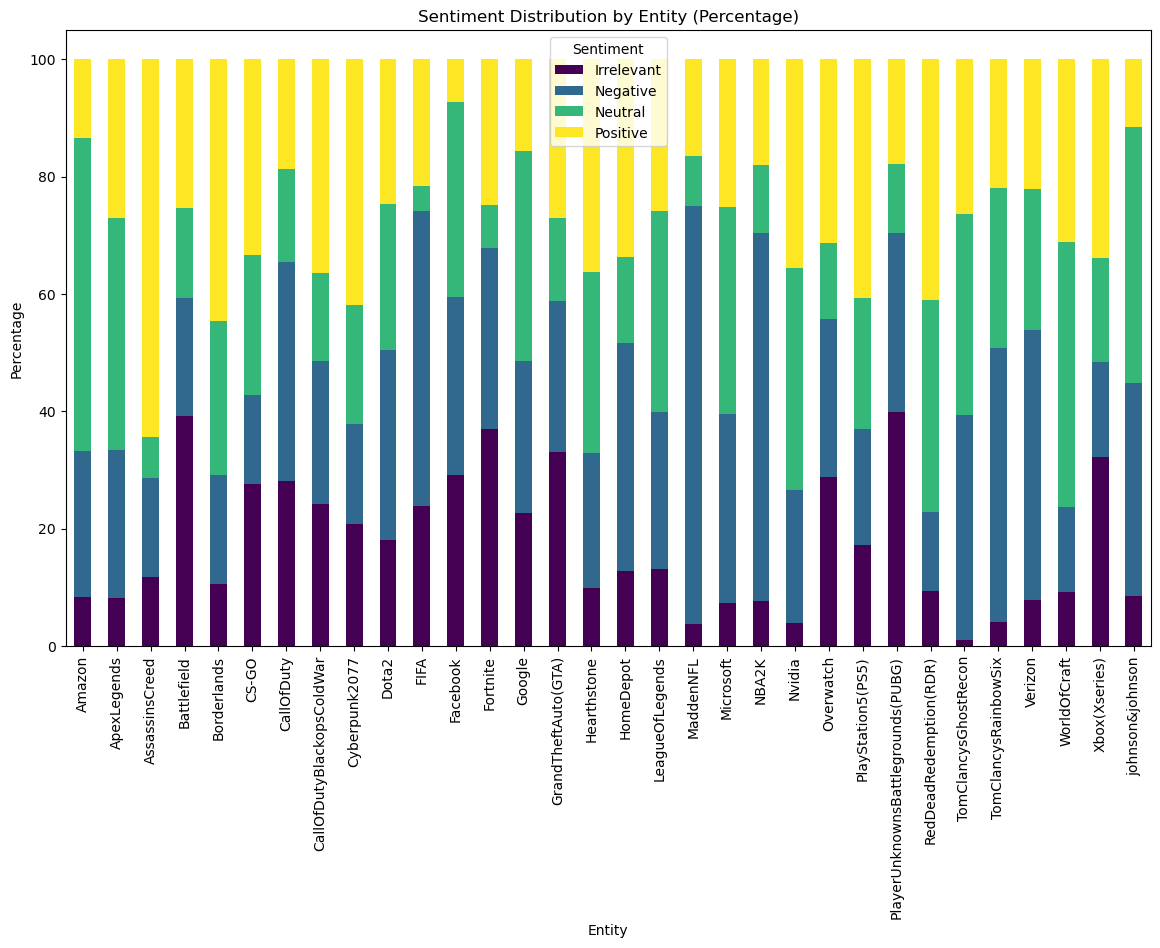

In [19]:
# Plot the normalized sentiment distribution for each entity
entity_sentiment_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Distribution by Entity (Percentage)')
plt.xlabel('Entity')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


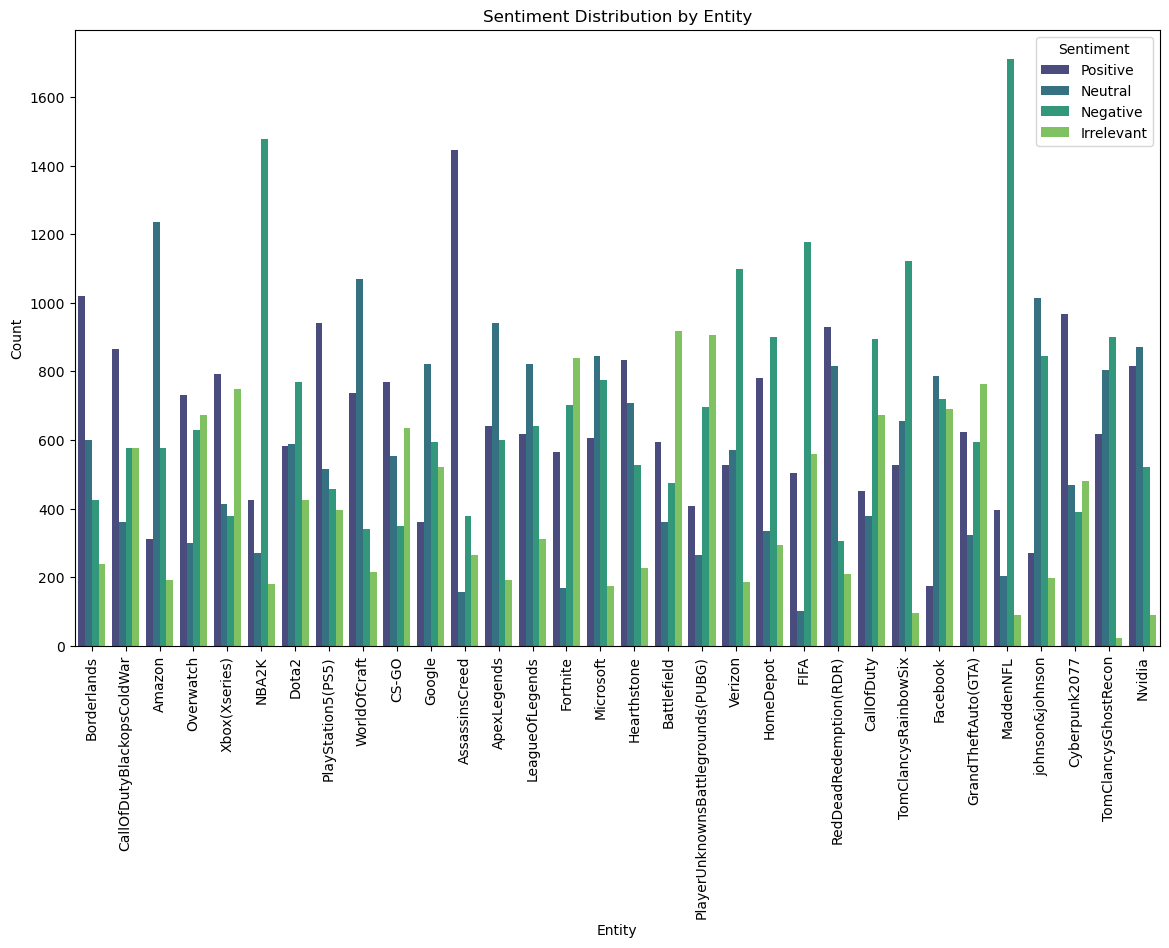

In [21]:
# Plot sentiment distribution for each entity
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Entity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Filter tweets with positive sentiment
positive_tweets = df[df['Sentiment'] == 'Positive']

# Filter tweets with negative sentiment
negative_tweets = df[df['Sentiment'] == 'Negative']

# Example: Display first few positive tweets
print("Positive Tweets:")
print(positive_tweets.head())

# Example: Display first few negative tweets
print("\nNegative Tweets:")
print(negative_tweets.head())

Positive Tweets:
   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Negative Tweets:
    Tweet ID       Entity Sentiment  \
24      2405  Borderlands  Negative   
25      2405  Borderlands  Negative   
26      2405  Borderlands  Negative   
27      2405  Borderlands  Negative   
28      2405  Borderlands  Negative   

                                        Tweet Content  
24  the biggest dissappoinment in my life came out...  
25  The biggest disappointment of my life came a y...  
26 

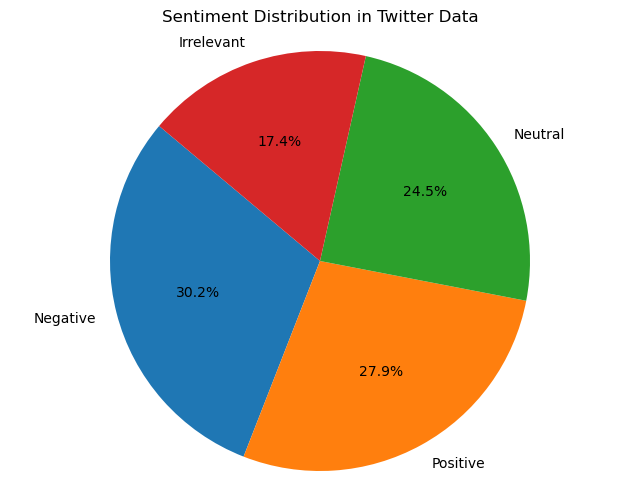

In [27]:
# Pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Twitter Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
